In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('global_laptop_selling_data.csv')

In [4]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [5]:
df.shape

(1303, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [7]:
df.nunique()

laptop_ID           1303
Company               19
Product              618
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  106
OpSys                  9
Weight               179
Price_euros          791
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

# Preprocessing

In [10]:
df = df.drop('laptop_ID', axis=1)

In [11]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [12]:
df["Weight"] = df["Weight"].str.replace("kg","")
df["Weight"] = pd.to_numeric(df["Weight"])
df["Ram"] = df["Ram"].apply(lambda x : str(x).replace("GB","")).astype(int)

In [13]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


<AxesSubplot:xlabel='Price_euros', ylabel='Density'>

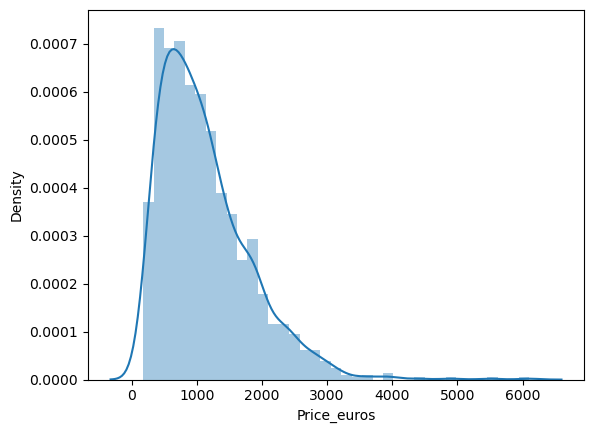

In [14]:
sns.distplot(df['Price_euros'])

In [15]:
df_product_price = df.groupby("Company")["Price_euros"].mean()

In [16]:
df_product_price

Company
Acer          626.775825
Apple        1564.198571
Asus         1104.169367
Chuwi         314.296667
Dell         1186.068990
Fujitsu       729.000000
Google       1677.666667
HP           1067.774854
Huawei       1424.000000
LG           2099.000000
Lenovo       1086.384444
MSI          1728.908148
Mediacom      295.000000
Microsoft    1612.308333
Razer        3346.142857
Samsung      1413.444444
Toshiba      1267.812500
Vero          217.425000
Xiaomi       1133.462500
Name: Price_euros, dtype: float64

In [17]:
df_product_price = pd.DataFrame(data = df_product_price)
df_product_price.columns = ["Product Avg Price"]
df_product_price.sort_values(by="Product Avg Price",ascending=False,inplace=True)

Text(0.5, 1.0, 'Average Price Per Company')

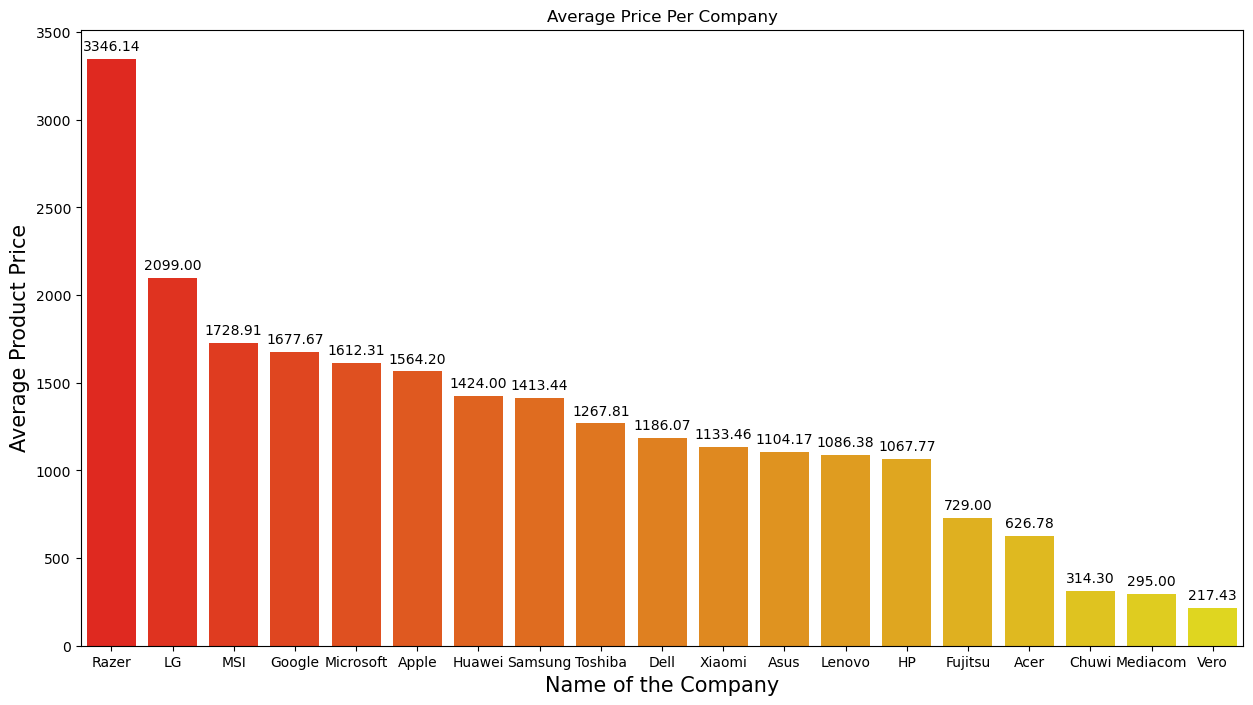

In [18]:
plt.figure(figsize = (15,8))
splot = sns.barplot(data = df_product_price,x= df_product_price.index, y = 'Product Avg Price', palette = 'autumn')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
plt.xlabel("Name of the Company", size=15)
plt.ylabel("Average Product Price", size=15)
plt.title('Average Price Per Company')

<AxesSubplot:>

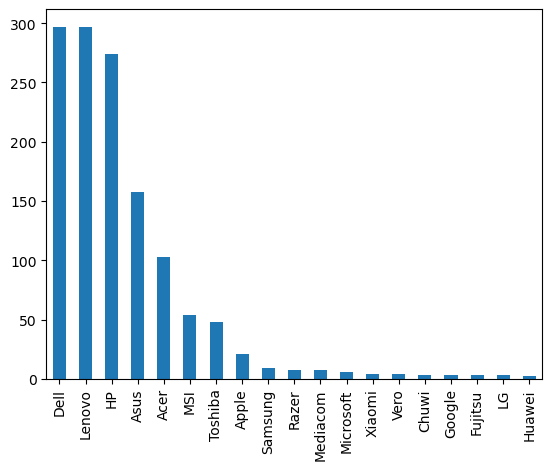

In [19]:
df['Company'].value_counts().plot(kind='bar')

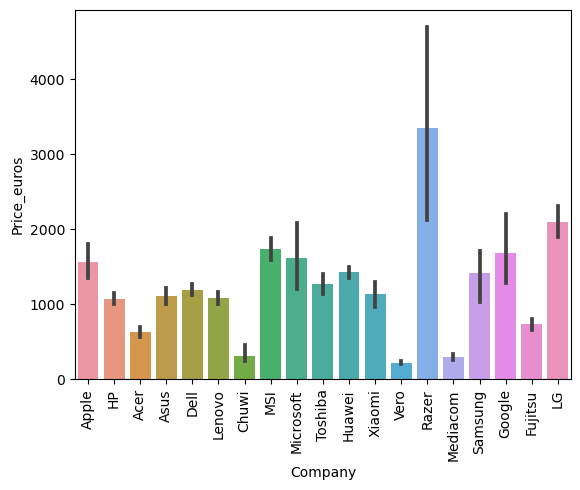

In [20]:
sns.barplot(x=df['Company'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:>

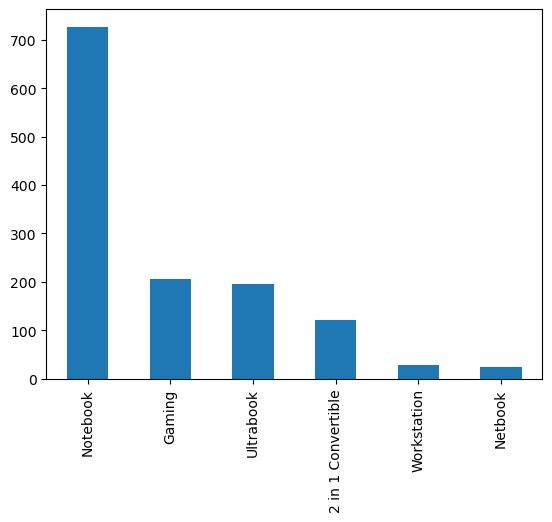

In [21]:
df['TypeName'].value_counts().plot(kind='bar')

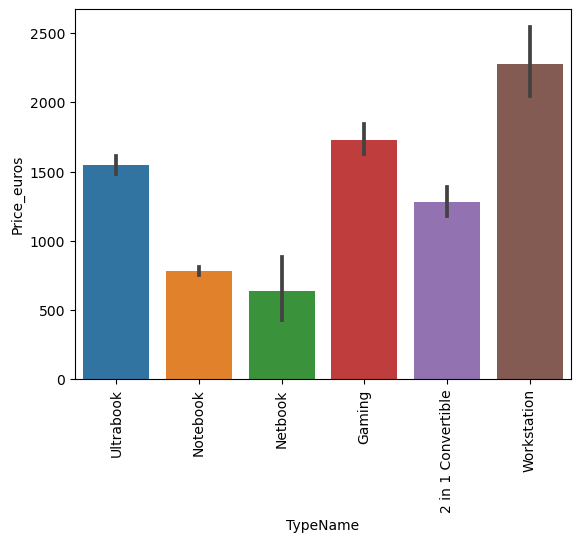

In [22]:
sns.barplot(x=df['TypeName'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:xlabel='Inches', ylabel='Density'>

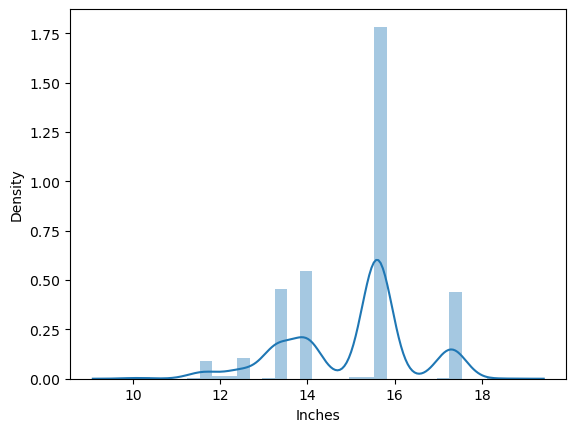

In [23]:
sns.distplot(df['Inches'])

<AxesSubplot:xlabel='Inches', ylabel='Price_euros'>

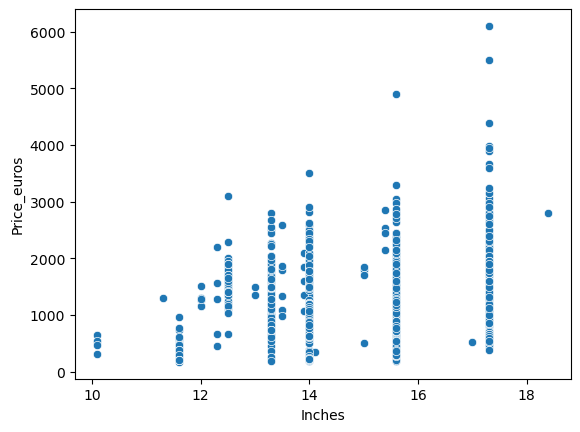

In [24]:
sns.scatterplot(x=df['Inches'],y=df['Price_euros'])

In [25]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [26]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [27]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0


<AxesSubplot:>

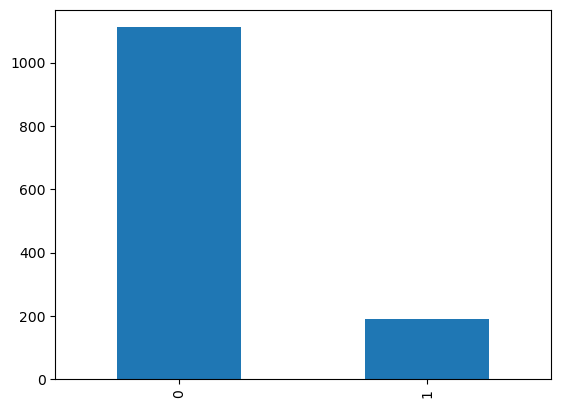

In [28]:
df['Touchscreen'].value_counts().plot(kind = 'bar')

<AxesSubplot:xlabel='Touchscreen', ylabel='Price_euros'>

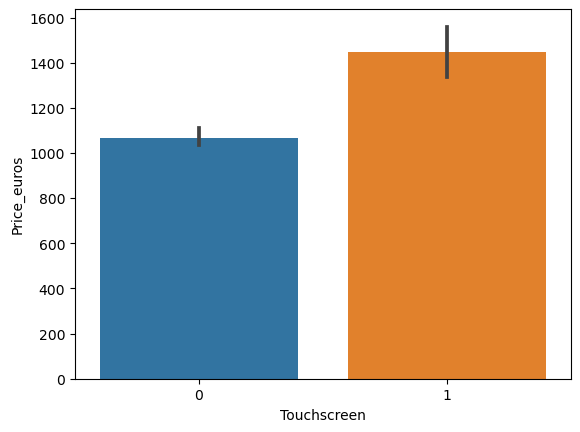

In [29]:
sns.barplot(x = df['Touchscreen'], y = df['Price_euros'])

In [30]:
df['IPS'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [31]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1


<AxesSubplot:>

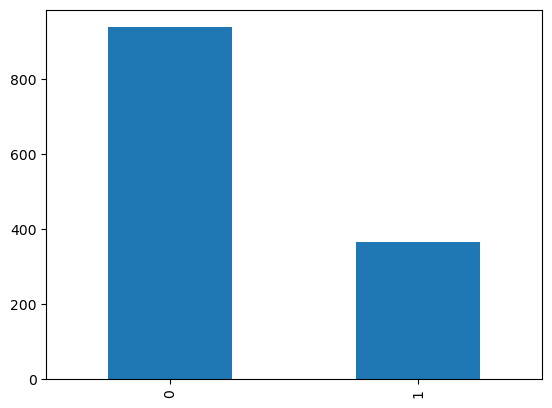

In [32]:
df['IPS'].value_counts().plot(kind = 'bar')

<AxesSubplot:xlabel='IPS', ylabel='Price_euros'>

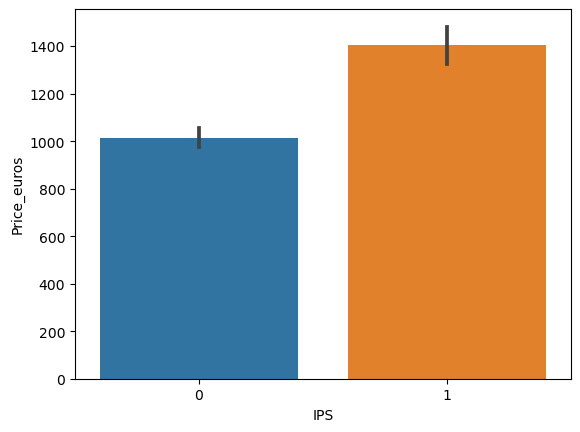

In [33]:
sns.barplot(x = df['IPS'], y = df['Price_euros'])

In [34]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [35]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [36]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,Cpu Name
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,Intel Core i5
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,Intel Core i5
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,Intel Core i5
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,Intel Core i5


In [37]:
df['Cpu Name'].unique()

array(['Intel Core i5', 'Intel Core i7', 'AMD A9-Series 9420',
       'Intel Core i3', 'Intel Core M', 'Intel Atom x5-Z8350',
       'AMD E-Series E2-9000e', 'Intel Atom x5-Z8300',
       'AMD E-Series E2-6110', 'AMD A6-Series 9220', 'Intel Celeron Dual',
       'AMD Ryzen 1700', 'Intel Pentium Quad', 'Intel Atom x5-Z8550',
       'AMD FX 9830P', 'AMD E-Series 6110', 'Intel Xeon E3-1505M',
       'AMD E-Series 9000e', 'AMD A10-Series A10-9620P',
       'AMD A6-Series A6-9220', 'AMD A10-Series 9600P',
       'AMD A8-Series 7410', 'AMD A12-Series 9720P', 'Intel Celeron Quad',
       'AMD Ryzen 1600', 'AMD A10-Series 9620P', 'AMD E-Series 7110',
       'AMD A9-Series A9-9420', 'Intel Xeon E3-1535M',
       'AMD E-Series E2-9000', 'AMD A6-Series 7310', 'Intel Atom Z8350',
       'Intel Pentium Dual', 'AMD A12-Series 9700P', 'AMD A4-Series 7210',
       'AMD FX 8800P', 'Intel Atom X5-Z8350', 'Samsung Cortex A72&A53',
       'AMD E-Series 9000', 'AMD A9-Series 9410'], dtype=object)

In [38]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [39]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

In [40]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,Cpu Name,Cpu brand
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,Intel Core i5,Intel Core i5
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,Intel Core i5,Intel Core i5
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,Intel Core i5,Intel Core i5
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,Intel Core i7,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,Intel Core i5,Intel Core i5


<AxesSubplot:>

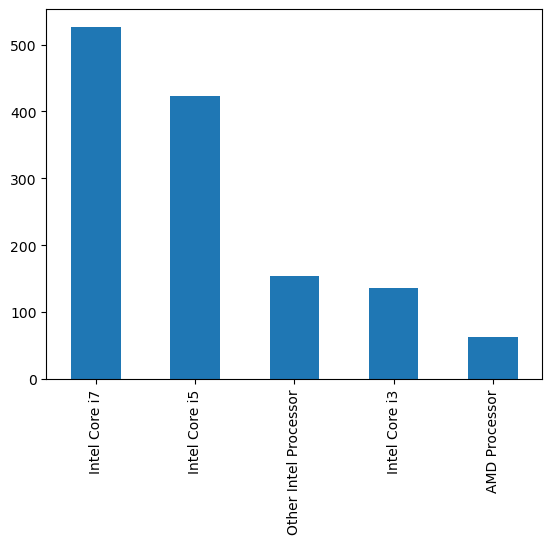

In [41]:
df['Cpu brand'].value_counts().plot(kind='bar')

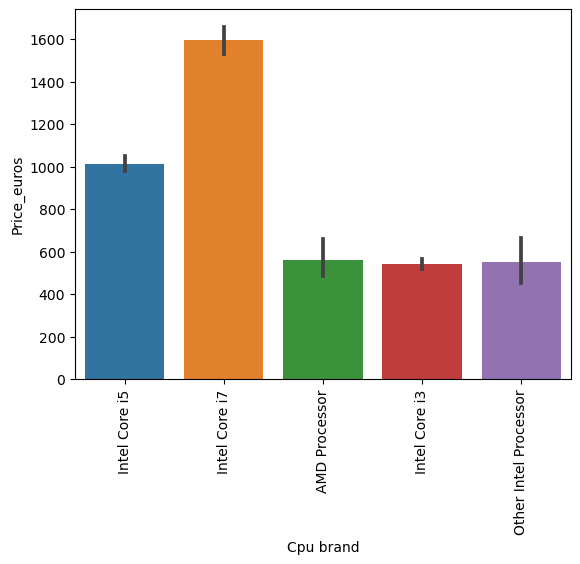

In [42]:
sns.barplot(x=df['Cpu brand'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

In [43]:
df.drop(columns = ['Cpu','Cpu Name'],inplace=True)

In [44]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,Cpu brand
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,Intel Core i5
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,Intel Core i5
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,Intel Core i5
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,Intel Core i5


In [45]:
df['Gpu'].value_counts()

Intel HD Graphics 620      282
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Intel Graphics 620           1
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
ARM Mali T860 MP4            1
Name: Gpu, Length: 106, dtype: int64

In [46]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [47]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,Cpu brand,Gpu brand
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,Intel Core i5,Intel
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,Intel Core i5,Intel
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,Intel Core i5,Intel
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,Intel Core i7,AMD
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,Intel Core i5,Intel


In [48]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

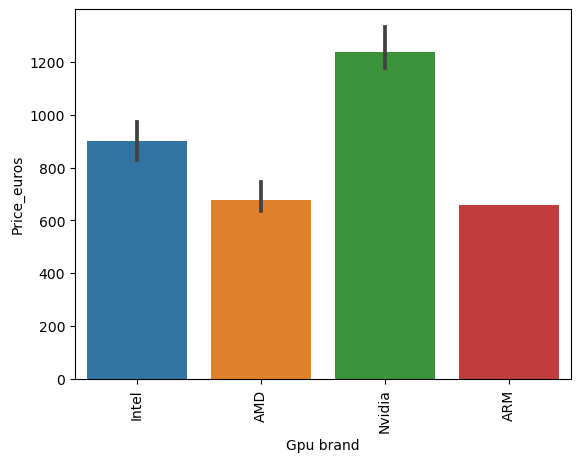

In [49]:
sns.barplot(x=df['Gpu brand'],y=df['Price_euros'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [50]:
df.drop(columns=['Gpu'],inplace=True)

In [51]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Ram,Memory,OpSys,Weight,Price_euros,Touchscreen,IPS,Cpu brand,Gpu brand
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,macOS,1.37,1339.69,0,1,Intel Core i5,Intel
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,8,128GB Flash Storage,macOS,1.34,898.94,0,0,Intel Core i5,Intel
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8,256GB SSD,No OS,1.86,575.00,0,0,Intel Core i5,Intel
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512GB SSD,macOS,1.83,2537.45,0,1,Intel Core i7,AMD
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256GB SSD,macOS,1.37,1803.60,0,1,Intel Core i5,Intel


<AxesSubplot:>

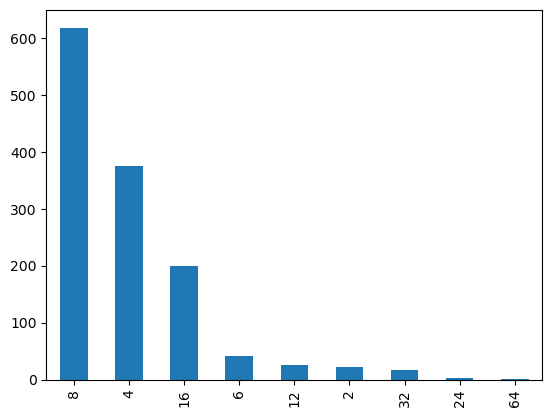

In [52]:
df['Ram'].value_counts().plot(kind='bar')

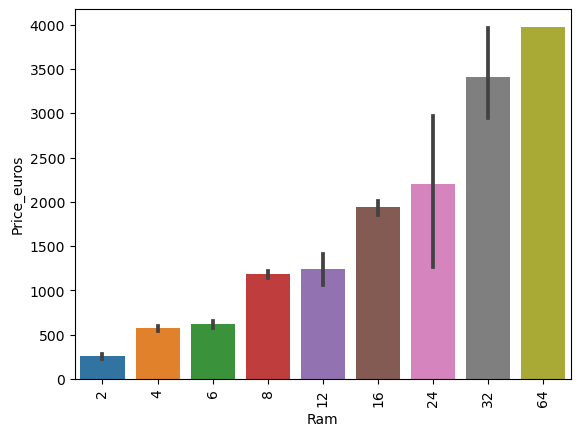

In [53]:
sns.barplot(x=df['Ram'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

In [54]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [55]:
df['Memory_Type'] = df['Memory'].apply(lambda x:x.split()[0])

In [56]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Ram,Memory,OpSys,Weight,Price_euros,Touchscreen,IPS,Cpu brand,Gpu brand,Memory_Type
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,macOS,1.37,1339.69,0,1,Intel Core i5,Intel,128GB
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,8,128GB Flash Storage,macOS,1.34,898.94,0,0,Intel Core i5,Intel,128GB
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8,256GB SSD,No OS,1.86,575.00,0,0,Intel Core i5,Intel,256GB
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512GB SSD,macOS,1.83,2537.45,0,1,Intel Core i7,AMD,512GB
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256GB SSD,macOS,1.37,1803.60,0,1,Intel Core i5,Intel,256GB


In [57]:
df.drop(columns=['Memory'],inplace=True)

In [58]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Ram,OpSys,Weight,Price_euros,Touchscreen,IPS,Cpu brand,Gpu brand,Memory_Type
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,1339.69,0,1,Intel Core i5,Intel,128GB
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,8,macOS,1.34,898.94,0,0,Intel Core i5,Intel,128GB
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8,No OS,1.86,575.00,0,0,Intel Core i5,Intel,256GB
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,macOS,1.83,2537.45,0,1,Intel Core i7,AMD,512GB
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,1803.60,0,1,Intel Core i5,Intel,256GB


In [59]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

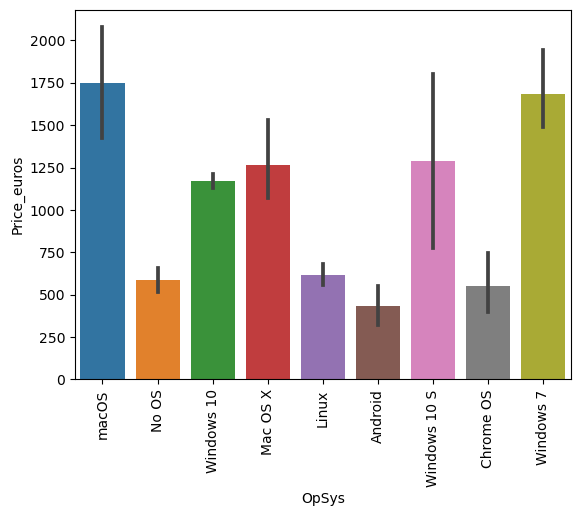

In [60]:
sns.barplot(x=df['OpSys'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

In [61]:
def com_os(os):
    if os == 'Windows 10' or os == 'Windows 7' or os == 'Windows 10 S':
        return 'Windows'
    elif os == 'macOS' or os == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [62]:
df['os'] = df['OpSys'].apply(com_os)

In [63]:
df['os'].value_counts()

Windows               1125
Others/No OS/Linux     157
Mac                     21
Name: os, dtype: int64

In [64]:
df.os = df.os.replace(['Windows', 'Others/No OS/Linux','Mac'],[0,1,2])

In [65]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Ram,OpSys,Weight,Price_euros,Touchscreen,IPS,Cpu brand,Gpu brand,Memory_Type,os
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,1339.69,0,1,Intel Core i5,Intel,128GB,2
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,8,macOS,1.34,898.94,0,0,Intel Core i5,Intel,128GB,2
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8,No OS,1.86,575.00,0,0,Intel Core i5,Intel,256GB,1
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,macOS,1.83,2537.45,0,1,Intel Core i7,AMD,512GB,2
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,1803.60,0,1,Intel Core i5,Intel,256GB,2


In [66]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

In [67]:
def Gpu(Gpu):
    if Gpu== 'Intel':
        return 'Intel'
    elif Gpu == 'Nvidia':
        return 'Nvidia'
    else:
        return 'AMD/ARM'

In [68]:
df['Gpu'] = df['Gpu brand'].apply(Gpu)

In [69]:
df.drop(columns=['OpSys'],inplace=True)

In [70]:
df.Gpu = df.Gpu.replace(['Intel', 'Nvidia','AMD/ARM'],[0,1,2])

In [71]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Ram,Weight,Price_euros,Touchscreen,IPS,Cpu brand,Gpu brand,Memory_Type,os,Gpu
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,1.37,1339.69,0,1,Intel Core i5,Intel,128GB,2,0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,8,1.34,898.94,0,0,Intel Core i5,Intel,128GB,2,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8,1.86,575.00,0,0,Intel Core i5,Intel,256GB,1,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,1.83,2537.45,0,1,Intel Core i7,AMD,512GB,2,2
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,1.37,1803.60,0,1,Intel Core i5,Intel,256GB,2,0


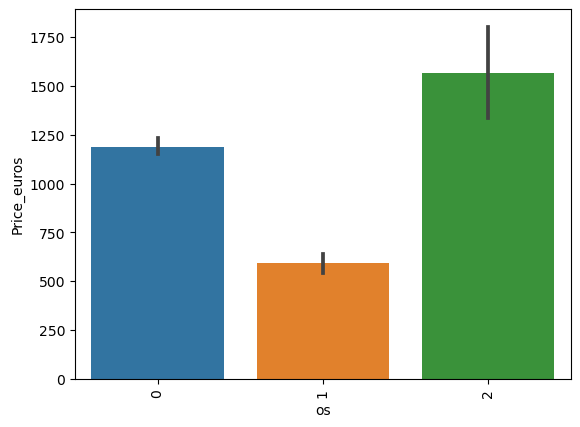

In [72]:
sns.barplot(x=df['os'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

In [73]:
df.corr()['Price_euros']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price_euros    1.000000
Touchscreen    0.191226
IPS            0.252208
os            -0.177681
Gpu            0.030827
Name: Price_euros, dtype: float64

<AxesSubplot:>

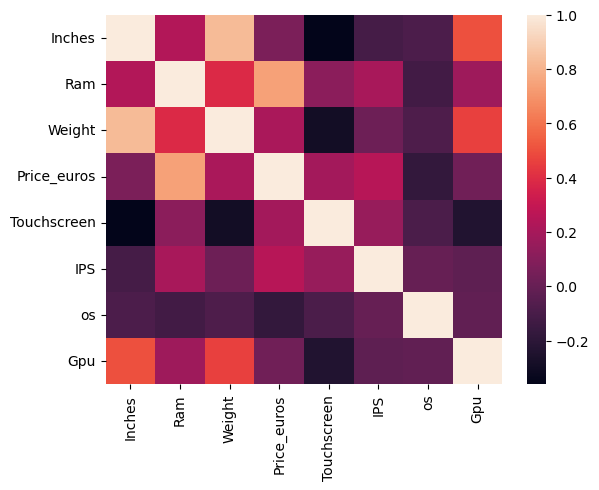

In [74]:
sns.heatmap(df.corr())

<AxesSubplot:xlabel='Price_euros', ylabel='Density'>

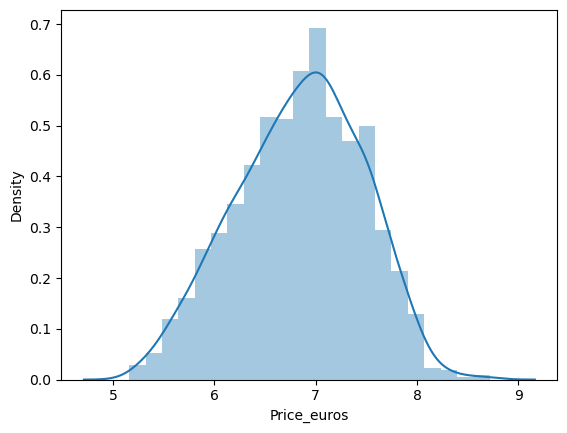

In [75]:
sns.distplot(np.log(df['Price_euros']))

In [76]:
df1 = df.copy()

In [77]:
x = df1.drop(columns=['Price_euros','Company','Product','TypeName','ScreenResolution','Cpu brand',
                        'Gpu brand','Memory_Type'])
y = df[['Price_euros']]

In [78]:
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [79]:
x.head()

,Inches,Ram,Weight,Touchscreen,IPS,os,Gpu
0,13.3,8,1.37,0,1,2,0
1,13.3,8,1.34,0,0,2,0
2,15.6,8,1.86,0,0,1,0
3,15.4,16,1.83,0,1,2,2
4,13.3,8,1.37,0,1,2,0


In [80]:
y.head()

,Price_euros
0,1339.69
1,898.94
2,575.00
3,2537.45
4,1803.60


# Label Encoding

In [81]:
from sklearn.preprocessing import LabelEncoder

In [82]:
label_encoder = LabelEncoder()
label_encoder

LabelEncoder()

In [83]:
df1.Inches = label_encoder.fit_transform(df.Inches)
df1.Ram = label_encoder.fit_transform(df.Ram)
df1.Weight = label_encoder.fit_transform(df.Weight)
df1.Touchscreen = label_encoder.fit_transform(df.Touchscreen)
df1.IPS = label_encoder.fit_transform(df.IPS)
df1.os = label_encoder.fit_transform(df.os)
df1.Gpu = label_encoder.fit_transform(df.Gpu)

In [84]:
df1.head()

,Company,Product,TypeName,Inches,ScreenResolution,Ram,Weight,Price_euros,Touchscreen,IPS,Cpu brand,Gpu brand,Memory_Type,os,Gpu
0,Apple,MacBook Pro,Ultrabook,7,IPS Panel Retina Display 2560x1600,3,37,1339.69,0,1,Intel Core i5,Intel,128GB,2,0
1,Apple,Macbook Air,Ultrabook,7,1440x900,3,34,898.94,0,0,Intel Core i5,Intel,128GB,2,0
2,HP,250 G6,Notebook,14,Full HD 1920x1080,3,72,575.00,0,0,Intel Core i5,Intel,256GB,1,0
3,Apple,MacBook Pro,Ultrabook,13,IPS Panel Retina Display 2880x1800,5,69,2537.45,0,1,Intel Core i7,AMD,512GB,2,2
4,Apple,MacBook Pro,Ultrabook,7,IPS Panel Retina Display 2560x1600,3,37,1803.60,0,1,Intel Core i5,Intel,256GB,2,0


# Split DataSet into Training and Testing 

In [85]:
x_train,x_test,y_train,y_test = tts(x,y,test_size=.30,random_state=23)

In [86]:
x_train.shape

(912, 7)

In [87]:
x_test.shape

(391, 7)

# Appling LinearRegression

In [88]:
lin_reg = LinearRegression()
lin_reg

LinearRegression()

In [89]:
lin_reg.fit(x_train,y_train) #training

LinearRegression()

In [90]:
lin_pred = lin_reg.predict(x_test)
lin_pred

array([[1050.26552992],
       [ 491.43656439],
       [1042.69265063],
       [ 782.72744194],
       [ 583.3972231 ],
       [ 465.75829263],
       [1900.74562413],
       [1963.35275519],
       [1174.45667153],
       [ 583.3972231 ],
       [1779.77392264],
       [1192.25990079],
       [ 661.39442401],
       [ 661.39442401],
       [1017.73158252],
       [1217.95978639],
       [ 723.67924926],
       [ 725.955394  ],
       [1041.21501565],
       [ 925.09931385],
       [1273.49418433],
       [ 721.64750116],
       [1109.22567646],
       [ 842.23259171],
       [1713.70019202],
       [ 845.92667917],
       [ 622.39582355],
       [1967.97036451],
       [ 972.82244213],
       [1170.12275319],
       [2086.17150041],
       [ 842.23259171],
       [1375.322623  ],
       [1201.16371348],
       [ 967.46601531],
       [1211.48262938],
       [2037.08015141],
       [1236.71203635],
       [1850.36134453],
       [1106.27040649],
       [1003.91764621],
       [1104.792

In [91]:
lin_reg.predict([[13.3,8,1.37,0,1,2,0]])

array([[974.97822239]])

# Evaluate Model(Accuracy,MSE,MAE)

In [92]:
accuracy1 = r2_score(y_test,lin_pred)
accuracy1

0.6137976505365512

In [93]:
mse = mean_squared_error(y_test,lin_pred)
mse

202056.71295865695

In [94]:
mae = mean_absolute_error(y_test,lin_pred)
mae

326.15816917940657

# Applining KNN Regression

In [95]:
from sklearn.neighbors import KNeighborsRegressor

In [96]:
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(x_train,y_train)

KNeighborsRegressor()

In [97]:
knn_pred = neigh.predict(x_test)
knn_pred

array([[ 920.52 ],
       [ 426.876],
       [ 834.2  ],
       [ 622.112],
       [ 447.   ],
       [ 283.   ],
       [1730.98 ],
       [2199.6  ],
       [1637.4  ],
       [ 447.   ],
       [2092.596],
       [1003.6  ],
       [ 838.2  ],
       [ 838.2  ],
       [1239.498],
       [1341.6  ],
       [ 827.4  ],
       [ 541.4  ],
       [ 857.6  ],
       [ 603.8  ],
       [1347.8  ],
       [ 651.   ],
       [1152.346],
       [ 636.202],
       [1837.54 ],
       [ 772.4  ],
       [ 639.864],
       [1967.2  ],
       [ 641.882],
       [1527.   ],
       [2023.8  ],
       [ 636.202],
       [1494.998],
       [1700.62 ],
       [ 945.17 ],
       [1343.876],
       [1853.   ],
       [1198.276],
       [1711.8  ],
       [1713.6  ],
       [ 463.2  ],
       [1678.2  ],
       [1869.4  ],
       [ 567.574],
       [ 319.   ],
       [ 727.648],
       [ 504.8  ],
       [1445.8  ],
       [ 792.52 ],
       [ 594.668],
       [1849.4  ],
       [1595.8  ],
       [ 508

In [98]:
neigh.predict([[13.3,8,1.37,0,1,2,0]])

array([[1695.95]])

# Evaluate Model(Accuracy,MSE,MAE)

In [99]:
accuracy2 = r2_score(y_test,knn_pred)
accuracy2

0.6783858198908772

In [100]:
mse = mean_squared_error(y_test,knn_pred)
mse

168264.91129332993

In [101]:
mae = mean_absolute_error(y_test,knn_pred)
mae

283.26296163682866

# Comparison

In [103]:
df = pd.DataFrame(
    {
        'LinearRegression': [accuracy1],
        'KNN': [accuracy2]
    }
)

In [104]:
%matplotlib inline

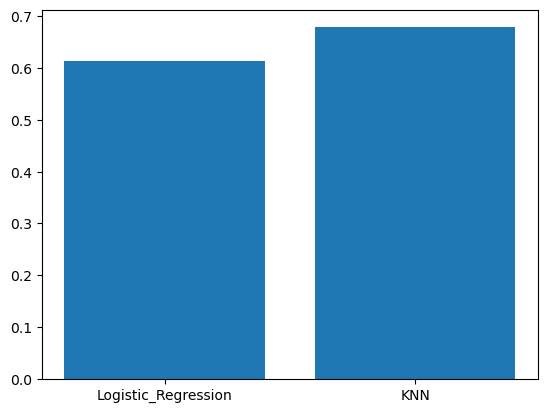

In [105]:
x = ['Logistic_Regression','KNN']
y = [accuracy1,accuracy2]
plt.bar(x,y)
plt.show()